# Курс «Машинное обучение в бизнесе»

## Урок 1. Кейс 1. EDA по Hourly Energy Consumption и Brent.

### Домашнее задание к уроку 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import shapiro

%matplotlib inline
import matplotlib.pyplot as plt

#### Задание 1

Выберите наборы данных. которые можно интерпретировать, как временные ряды:  
    а)    зависимость цены на недвижимость в конкретном регионе от времени,  
    б)    скорость полета самолета при перелете из аэропорта А в аэропорт В,  
    в)    количество отказов компьютера,  
    г)    число обращений в поликлинику по району,  
    д)    координаты автобуса при движении по маршруту,  
    е)    координаты фигуры нарушителя в файле видеофиксации охранной системы.  

Пойдем простым логическим путем.  
а) в самом условии упоминается зависимость от времени, следовательно этот набор явно можно интерпретировать как временной ряд.  
б) скорость есть производная расстояния от времени, следовательно такой набор тоже можно считать сременным рядом.  
в) количество отказов, тут надо смотреть на сами данные, если количество отказов по офису в целом, то это одно, но если это количество оказов компьютера за какой-то период времени, то это уже другое и тогда этот набор данных тоже можно интерпретировать как временной ряд.  
г) здесь так и напрашивается продолжить за отчетный период времени, тоже можно считать временным рядом.  
д) движение подразумевает какую-то последовательность событий, т.е. мы получаем координаты автобуса на маршруте через какие-то промежутки времени, это набор тоже можно считать временным рядом.  
е) видеофиксация, это последовательный набор кадров снятый с какой-то частотой и следовательно его тоже можно считать временным рядом.  
Получается, что при определенных дополнительных условиях все варианты можно считать временным рядом.

#### Задание 2

Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

Сначала просто загрузим надор и посмотрим на него.

In [2]:
df = pd.read_csv("DUQ_hourly.csv")

In [3]:
df.shape

(119068, 2)

In [4]:
df.tail(10)

,Datetime,DUQ_MW
119058,2018-01-01 15:00:00,1811.0
119059,2018-01-01 16:00:00,1828.0
119060,2018-01-01 17:00:00,1858.0
119061,2018-01-01 18:00:00,1960.0
119062,2018-01-01 19:00:00,1968.0
119063,2018-01-01 20:00:00,1962.0
119064,2018-01-01 21:00:00,1940.0
119065,2018-01-01 22:00:00,1891.0
119066,2018-01-01 23:00:00,1820.0
119067,2018-01-02 00:00:00,1721.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119068 entries, 0 to 119067
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  119068 non-null  object 
 1   DUQ_MW    119068 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


In [6]:
len(df) - df.count()

Datetime    0
DUQ_MW      0
dtype: int64

Набор состоит из двух столбцов: значений времени и каких-то значений числового типа с плавающей точкой. Причем набор полный, пропусков нет.

Загрузим этот набор определив первый столбец как индексируемый и сразу отсортируем индекс.

In [7]:
df_1 = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0]).sort_index()

In [8]:
df_1.shape

(119068, 1)

In [9]:
df_1.tail(10)

,DUQ_MW
Datetime,
2018-08-02 15:00:00,1983.0
2018-08-02 16:00:00,2029.0
2018-08-02 17:00:00,2039.0
2018-08-02 18:00:00,2050.0
2018-08-02 19:00:00,1999.0
2018-08-02 20:00:00,1966.0
2018-08-02 21:00:00,1944.0
2018-08-02 22:00:00,1901.0
2018-08-02 23:00:00,1789.0


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Проверим сортировку. Вычтем из первого набора значения второго набора. Если в первом наборе нарушена сортировка, то результат будет отличаться от нуля.

In [11]:
df['DUQ_MW'].values - df_1['DUQ_MW'].values

array([ 94., 104., 133., ..., -10.,  31.,  65.])

In [12]:
df['DUQ_MW'][0], df_1['DUQ_MW'][0]

(1458.0, 1364.0)

Очевидно, что изначально набор не сортированный.

Отрисуем график нашего набора данных.

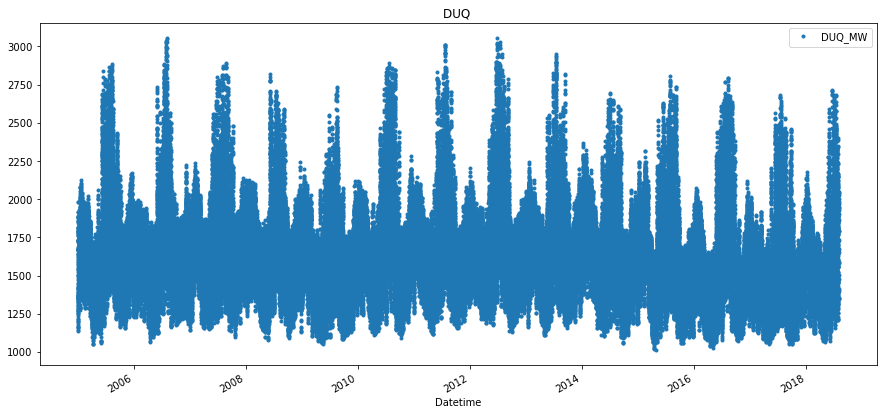

In [13]:
df_1.plot( style='.', figsize=( 15, 7 ), title='DUQ ' )

Видно, что набор периодический.

Посмотрим статистику.

In [14]:
df_1.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B865DD088>]],
      dtype=object)

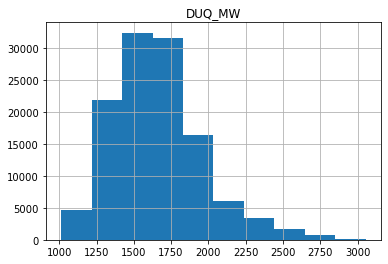

In [15]:
df_1.hist()

In [16]:
t, pv = shapiro(df_1['DUQ_MW'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
pv

0.0

Набор данных у нас не нормализованный.

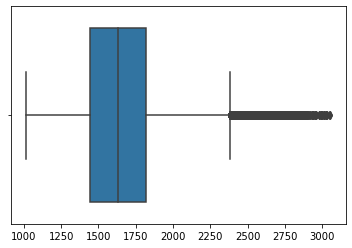

In [18]:
sns.boxplot(df_1.values)

Есть выбросы, которые связаны с ненормальностью распределения.

Попробуем определить период (визуально).

In [19]:
df_1['date'] = df_1.index

In [20]:
data_Y = df_1.loc[df_1['date'].dt.year > 2015]

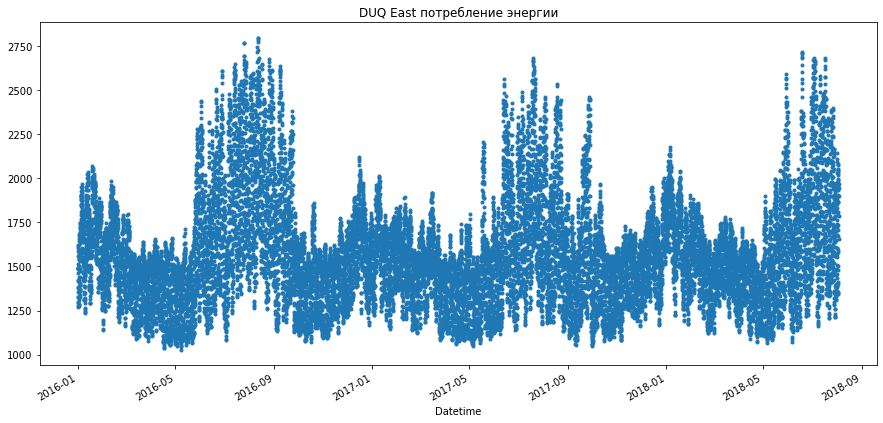

In [21]:
data_Y['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ East потребление энергии' )

Есть годовая периодичность связанная с сезонностью.

In [22]:
data_M = df_1.loc[df_1['date'].dt.year == 2012]

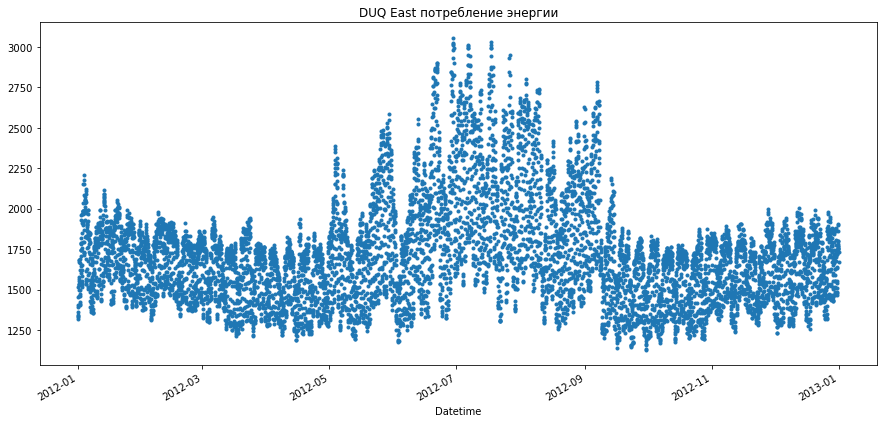

In [23]:
data_M['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ East потребление энергии' )

Месячной периодичности не замечается.

In [24]:
data_W = df_1.loc[np.logical_and(df_1['date'].dt.year == 2012, df_1['date'].dt.month == 10)]

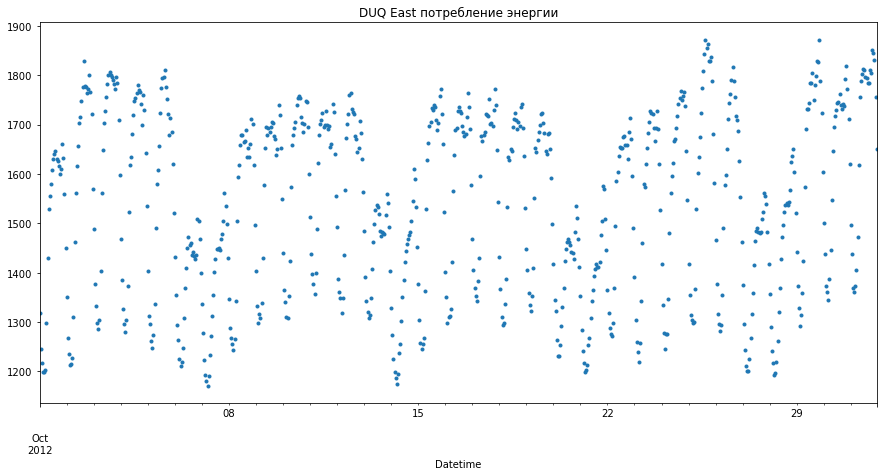

In [25]:
data_W['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ East потребление энергии' )

Есть выраженная недельная периодичность, где в выходные виден провал по значениям.

In [26]:
data_D = df_1.loc[np.logical_and( np.logical_and( df_1['date'].dt.year == 2012 , df_1['date'].dt.month == 10), df_1['date'].dt.day > 20  )]

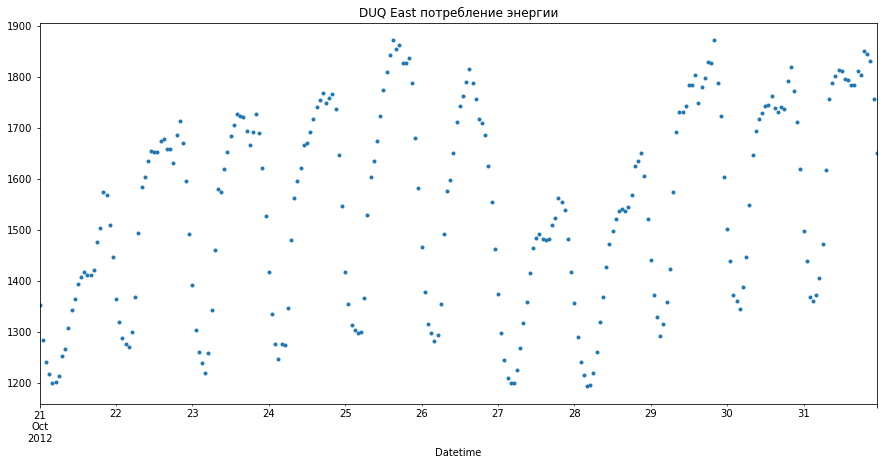

In [27]:
data_D['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ East потребление энергии' )

Есть суточная периодичность, связанная с тем, что в светлое время суток потребляется меньше энергии, нежели ночью.

Агрегируем данные по периодам.

In [28]:
data_Y = data_Y.resample('M').mean()

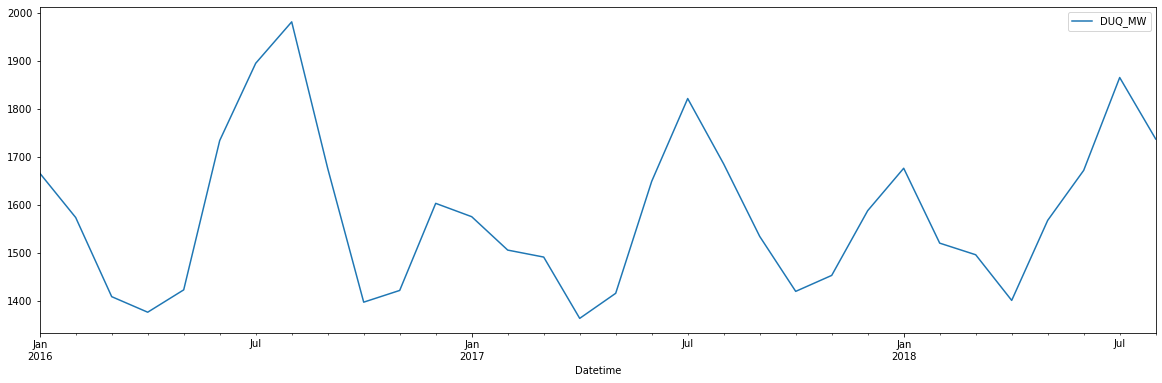

In [29]:
data_Y.plot(figsize=(20,6))

Очевидна сезонность временного ряда. В летний и зимний периоды потребление электроэнергии возрастает, весной и осенью потребление падает.

In [30]:
data_W = data_W.resample('D').mean()

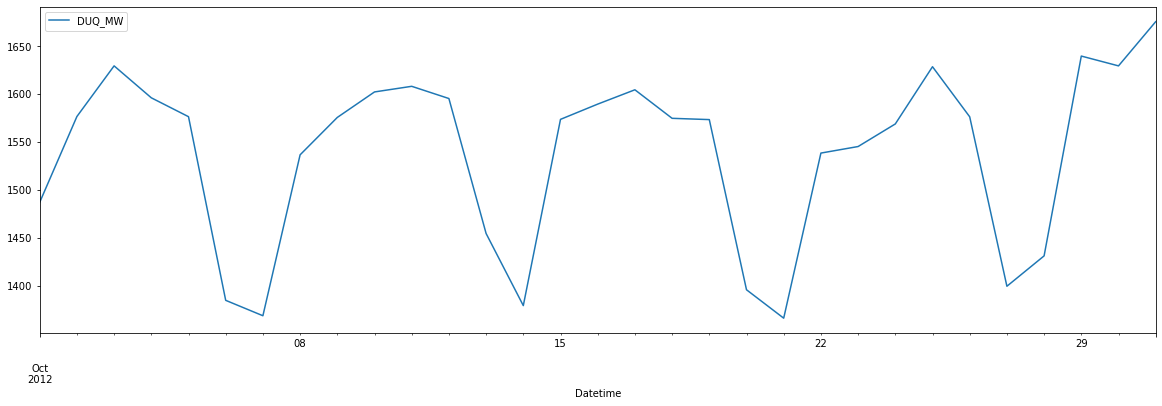

In [31]:
data_W.plot(figsize=(20,6))

Очевидна недельная периодичность.

In [32]:
data_D = data_D.resample('H').mean()

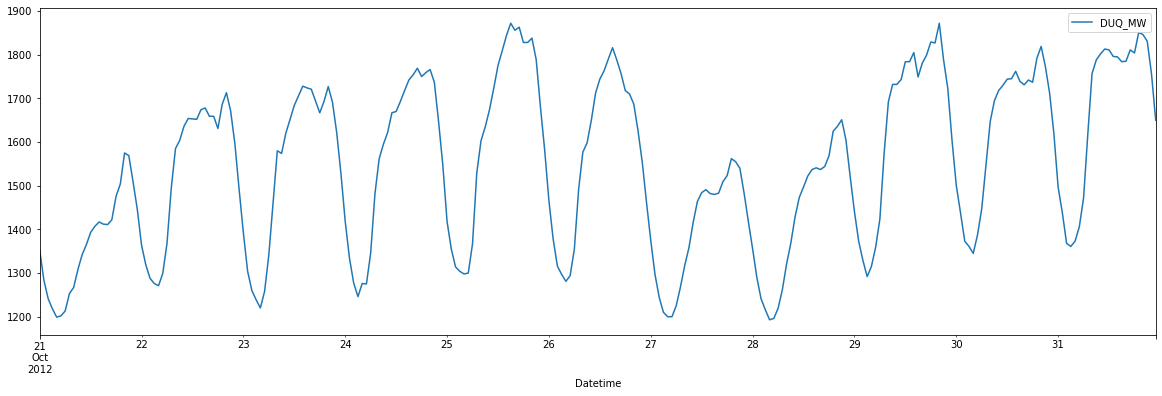

In [33]:
data_D.plot(figsize=(20,6))

Очевидна суточная периодичность.

Посмотрим еще агрегацию по годам.

In [34]:
df_1 = df_1.resample('Y').mean()

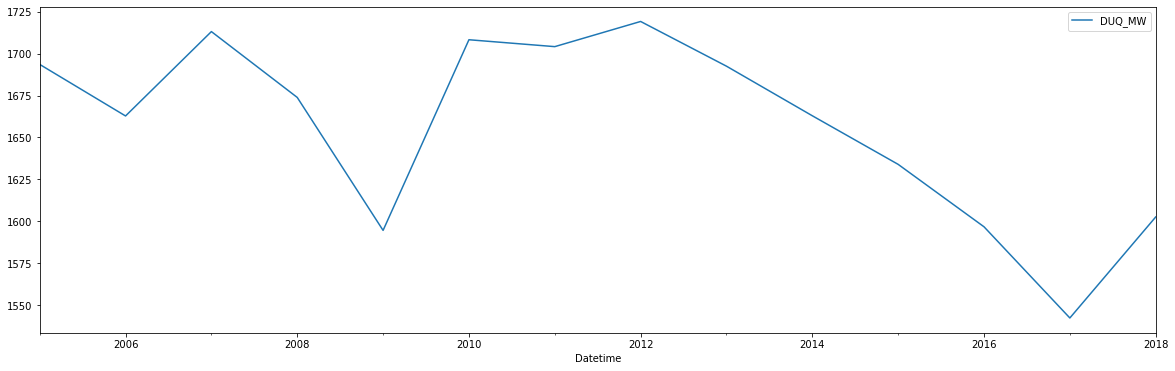

In [35]:
df_1.plot(figsize=(20,6))

Про периодичность более года сказать что-либо сложно, так как данных недостаточно, но можно предположить, что она возможно есть и связана с экономическими циклами в 8 лет, но это не точно.

Чтобы точно посчитать периоды надо посчитать конечные разности и разложить данные на моды, но и без такого анализа видно, что наблюдается годовая, недельная и суточная периодичность.

Наши данные качественные, но не сортированные, возможно есть статистические выбросы связанные с ненормальностью распределения данного набора, данные периодические, можно выделить годовой недельный и дневной периоды.

#### Задание 3

Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [36]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0]).sort_index()

In [37]:
brent_data.head(10)

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63
2010-09-06,76.87
2010-09-07,77.26
2010-09-08,77.93
2010-09-09,77.21


In [38]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


In [39]:
brent_data.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


In [40]:
len(brent_data) - brent_data.count()

Значение    0
dtype: int64

По неделям.

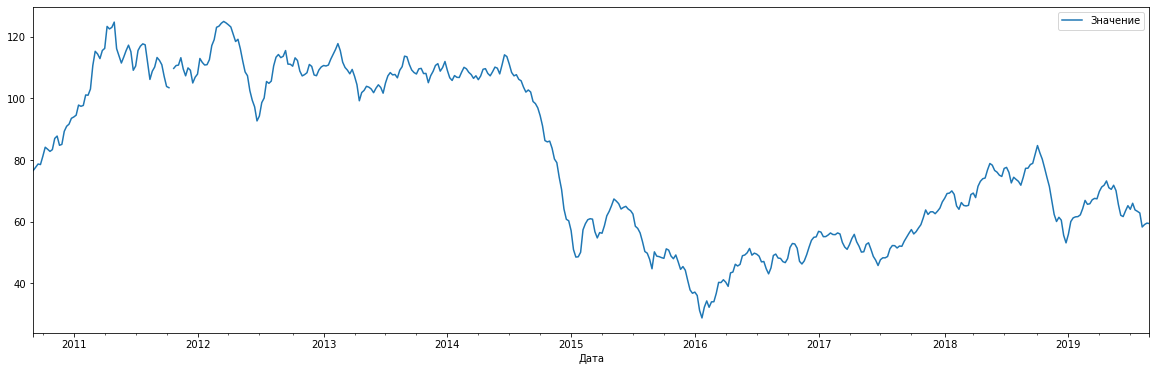

In [41]:
brent_data.resample('W').mean().plot(figsize=(20,6))

По месяцам.

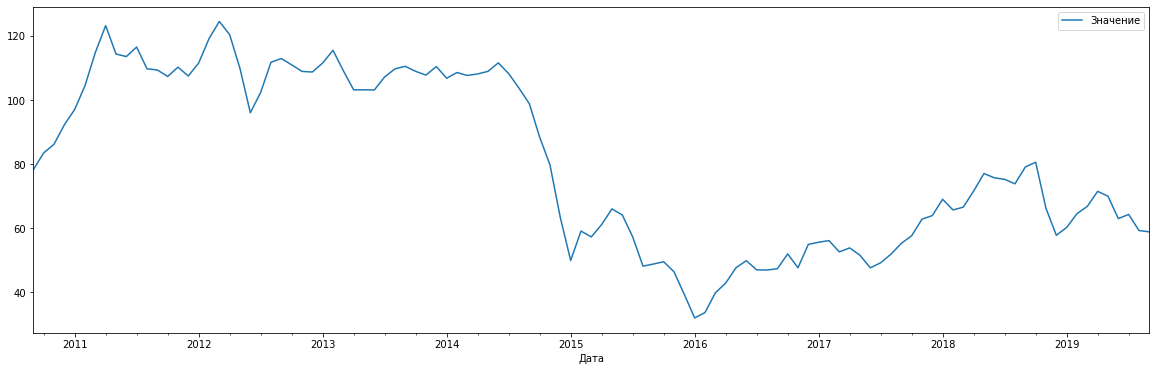

In [42]:
brent_data.resample('M').mean().plot(figsize=(20,6))

#### Задание 4

Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Недельная

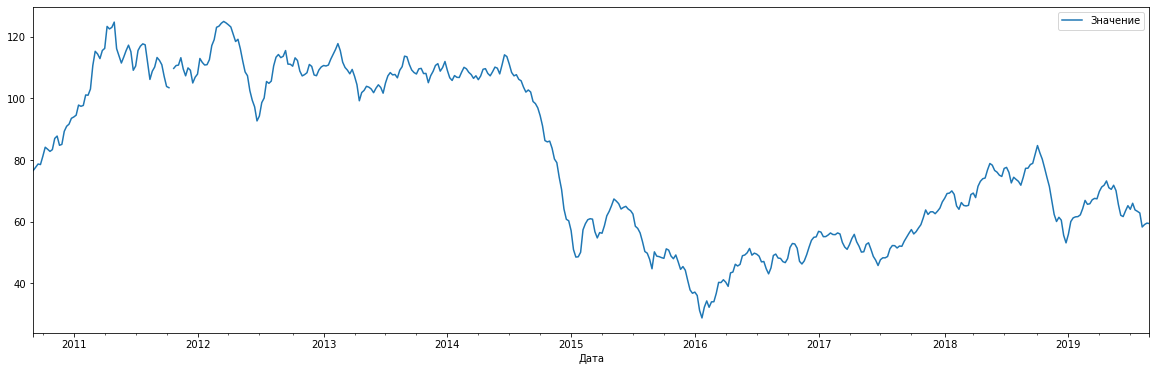

In [43]:
brent_data.resample('W').mean().plot(figsize=(20,6))

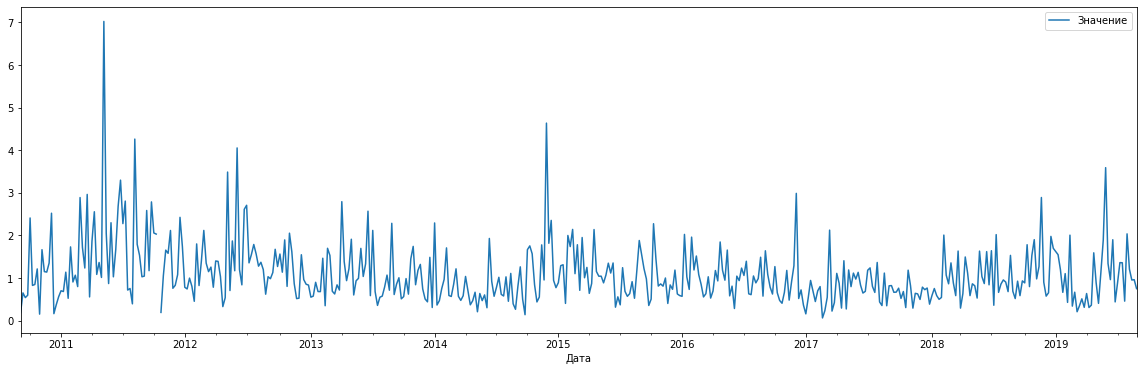

In [44]:
brent_data.resample('W').std().plot(figsize=(20,6))

Месячная

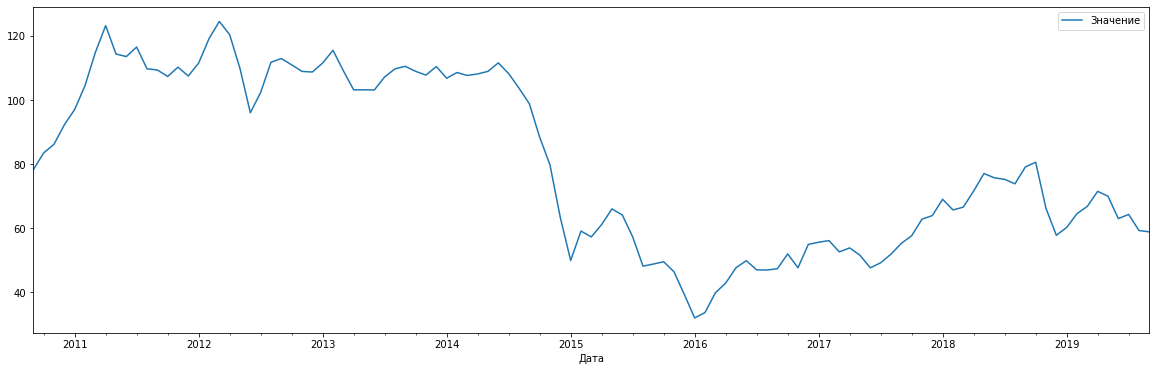

In [45]:
brent_data.resample('M').mean().plot(figsize=(20,6))

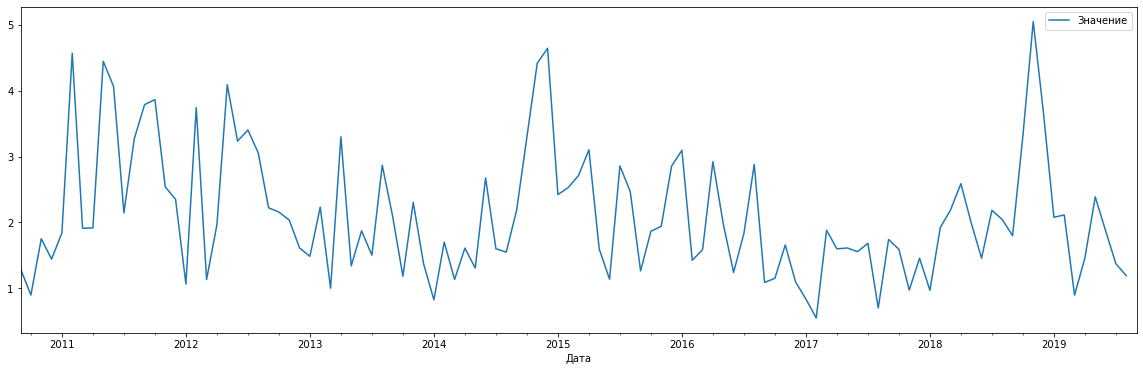

In [46]:
brent_data.resample('M').std().plot(figsize=(20,6))

Годовая.

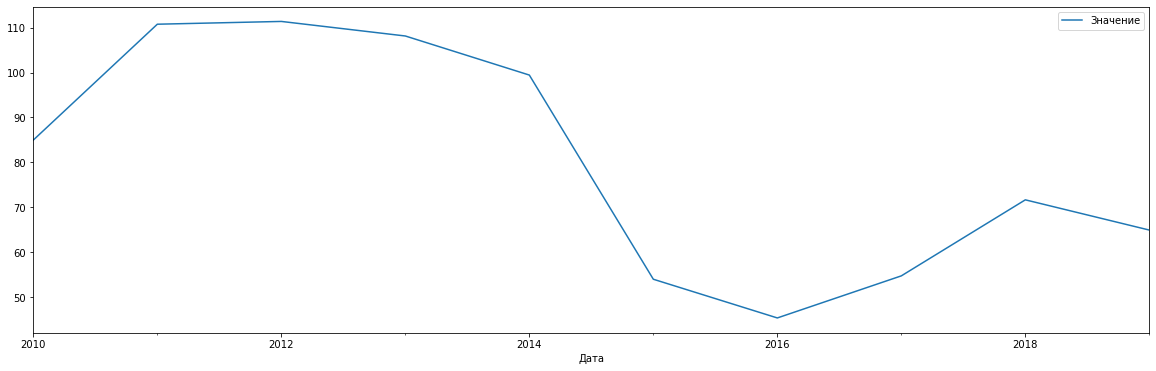

In [47]:
brent_data.resample('Y').mean().plot(figsize=(20,6))

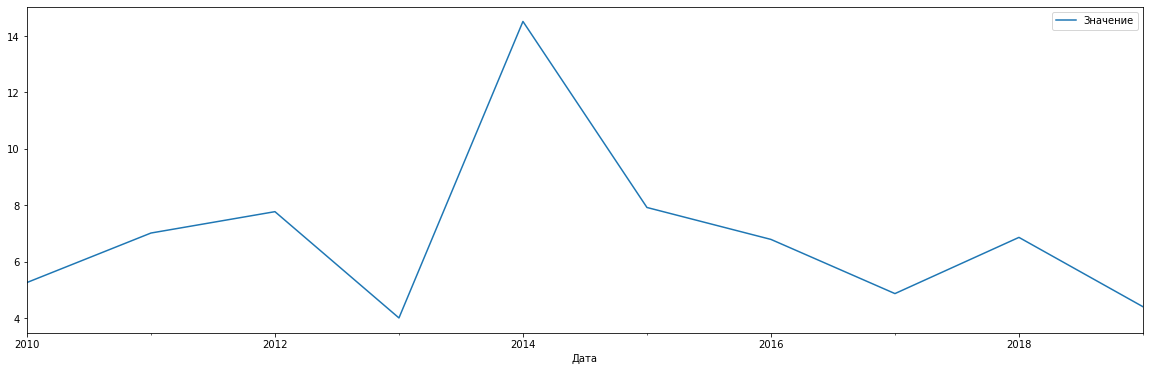

In [48]:
brent_data.resample('Y').std().plot(figsize=(20,6))

#### Задание 5

Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Чем больше период оцифровки, тем меньше случайных колебаний в данных, но и точность при этом падает.